In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
categorical = [col for col in df.columns if df[col].dtype=='O']

In [6]:
categorical
df.shape

(48842, 15)

In [7]:
df[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


In [8]:
df[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64

In [9]:
for var in categorical:
    print(df[var].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      

In [10]:
for var in categorical:
    print(df[var].value_counts()/float(len(df)))

workclass
Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: count, dtype: float64
education
HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: count, dtype: float64
marital-status
Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: coun

In [11]:
df['workclass'].replace('?',np.NaN,inplace=True)
df['occupation'].replace('?',np.NaN,inplace=True)
df['native-country'].replace('?',np.NaN,inplace=True)

    

In [12]:
for var in categorical:
    print(df[var].value_counts())
           

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         

In [13]:
df[categorical].isnull().sum()

workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
native-country     857
income               0
dtype: int64

In [14]:
print(df['workclass'].unique())

['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [15]:
for var in categorical:
    print(var, 'contains',len(df[var].unique()),'labels')

workclass contains 9 labels
education contains 16 labels
marital-status contains 7 labels
occupation contains 15 labels
relationship contains 6 labels
race contains 5 labels
gender contains 2 labels
native-country contains 42 labels
income contains 2 labels


In [16]:
numerical = [col for col in df.columns if df[col].dtype!='O']
numerical

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [17]:
df[numerical].value_counts()

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week
25   195994  2                0             0             40                3
30   342709  9                0             0             40                3
21   243368  1                0             0             50                3
20   117767  10               0             0             40                3
26   152035  9                0             0             40                3
                                                                           ..
31   186787  9                0             0             42                1
     187203  9                0             0             40                1
     187215  9                0             0             40                1
     187560  9                2174          0             40                1
90   347074  10               0             1944          12                1
Name: count, Length: 48361, dtype: int64

In [18]:
df[numerical].head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [19]:
for col in numerical:
    print(df[col].unique())

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
[226802  89814 336951 ... 129912 255835 257302]
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
[    0  7688  3103  6418  7298  3908 14084  5178 15024 99999  2597  2907
  4650  6497  1055  5013 27828  4934  4064  3674  2174 10605  3418   114
  2580  3411  4508  4386  8614 13550  6849  2463  3137  2885  2964  1471
 10566  2354  1424  1455  3325  4416 25236   594  2105  4787  2829   401
  4865  1264  1506 10520  3464  2653 20051  4101  1797  2407  3471  1086
  1848 14344  1151  2993  2290 15020  9386  2202  3818  2176  5455 11678
  7978  7262  6514 41310  3456  7430  2414  2062 34095  1831  6723  5060
 15831  2977  2346  3273  2329  9562  2635  4931  1731  6097   914  7896
  5556  1409  3781  3942  2538  3887 25124  7443  5721  1173  4687  6612
  6767  2961   991

In [20]:
df[numerical].isnull().sum()

age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64

In [21]:
X = df.drop(['income'],axis=1)
y = df['income']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape, X_test.shape

((39073, 14), (9769, 14))

In [24]:
X_train.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
dtype: object

In [25]:
numerical = [col for col in X_train if X_train[col].dtype!='O']
categorical = [col for col in X_train if X_train[col].dtype=='O']
numerical, categorical

(['age',
  'fnlwgt',
  'educational-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'],
 ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'gender',
  'native-country'])

In [26]:
X_train[numerical].isnull().sum()

age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64

In [27]:
X_train[categorical].isnull().mean()

workclass         0.057943
education         0.000000
marital-status    0.000000
occupation        0.058173
relationship      0.000000
race              0.000000
gender            0.000000
native-country    0.017173
dtype: float64

In [28]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.05794282496864843
occupation 0.05817316305377115
native-country 0.01717298390192716


In [29]:
for df2 in [X_train,X_test]:
    for col in categorical:
        df2[col].fillna(X_train[col].mode()[0],inplace=True)

In [30]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
dtype: int64

In [31]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
dtype: int64

In [32]:
X_train.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [33]:
X_test.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [34]:
X_train[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
37193,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
31093,Self-emp-not-inc,10th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
33814,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
14500,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
23399,Private,Assoc-voc,Never-married,Transport-moving,Not-in-family,White,Male,United-States


In [35]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=categorical)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [36]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
37193,42,1,0,0,0,0,0,0,0,145175,...,0,0,0,0,0,0,0,0,0,0
31093,52,0,1,0,0,0,0,0,0,175029,...,0,0,0,0,0,0,0,0,0,0
33814,34,0,0,1,0,0,0,0,0,172664,...,0,0,0,0,0,0,0,0,0,0
14500,28,1,0,0,0,0,0,0,0,125791,...,0,0,0,0,0,0,0,0,0,0
23399,46,1,0,0,0,0,0,0,0,28419,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
7762,56,1,0,0,0,0,0,0,0,33115,...,0,0,0,0,0,0,0,0,0,0
23881,25,1,0,0,0,0,0,0,0,112847,...,0,0,0,0,0,0,0,0,0,0
30507,43,1,0,0,0,0,0,0,0,170525,...,0,0,0,0,0,0,0,0,0,0
28911,32,1,0,0,0,0,0,0,0,186788,...,0,0,0,0,0,0,0,0,0,0
19484,39,1,0,0,0,0,0,0,0,277886,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_train.shape

(39073, 105)

In [39]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
7762,56,1,0,0,0,0,0,0,0,33115,...,0,0,0,0,0,0,0,0,0,0
23881,25,1,0,0,0,0,0,0,0,112847,...,0,0,0,0,0,0,0,0,0,0
30507,43,1,0,0,0,0,0,0,0,170525,...,0,0,0,0,0,0,0,0,0,0
28911,32,1,0,0,0,0,0,0,0,186788,...,0,0,0,0,0,0,0,0,0,0
19484,39,1,0,0,0,0,0,0,0,277886,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X_test.shape

(9769, 105)

In [41]:
cols = X_train.columns
cols

Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'fnlwgt',
       ...
       'native-country_32', 'native-country_33', 'native-country_34',
       'native-country_35', 'native-country_36', 'native-country_37',
       'native-country_38', 'native-country_39', 'native-country_40',
       'native-country_41'],
      dtype='object', length=105)

In [42]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train

array([[ 0.25,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.75, -1.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.15, -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-0.45,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.45, -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.1 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [44]:
X_train = pd.DataFrame(X_train,columns=cols)

In [45]:
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.273095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.75,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.024521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.15,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.044213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.434493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.245244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39068,-0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.812949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39069,-0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.585757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39070,-0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39071,0.45,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.677113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X_test

array([[ 0.95,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.6 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.3 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-0.6 , -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.95,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.75,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [47]:
X_test = pd.DataFrame(X_test,columns=cols)

In [48]:
X_test

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
0,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.206143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.542269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.062023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.831900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,0.65,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.645240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9765,0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.593217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9766,-0.60,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.084421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9767,-0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.064779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [50]:
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '>50K'],
      dtype='<U5')

In [51]:
from sklearn.metrics import accuracy_score

print('Model occuracy score {}'.format(accuracy_score(y_test,y_pred)))

Model occuracy score 0.8079639676527792


In [52]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

In [53]:
print('Training-set occuracy score {}'.format(accuracy_score(y_train,y_pred_train)))

Training-set occuracy score 0.8011926394185243


In [54]:
print('Training set score: {}'.format(gnb.score(X_train,y_train)))
print('Test set score: {}'.format(gnb.score(X_test,y_test)))

Training set score: 0.8011926394185243
Test set score: 0.8079639676527792


In [55]:
y_test.value_counts()

income
<=50K    7479
>50K     2290
Name: count, dtype: int64

In [56]:
null_accuracy = (7479/(7479+2290))
null_accuracy

0.7655850138192241

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

print('confusion matrix\n',cm)
print('True positives\n',cm[0,0])
print('False positives\n',cm[0,1])
print('False Negatives\n',cm[1,0])
print('True Negative\n',cm[1,1])

confusion matrix
 [[6025 1454]
 [ 422 1868]]
True positives
 6025
False positives
 1454
False Negatives
 422
True Negative
 1868


<Axes: >

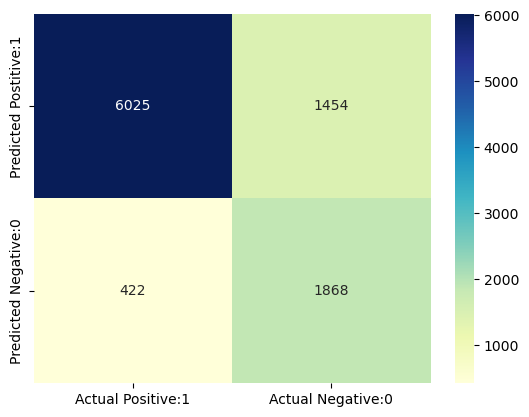

In [58]:
cm_matrix = pd.DataFrame(data=cm,columns=["Actual Positive:1","Actual Negative:0"],index=["Predicted Postitive:1","Predicted Negative:0"])

sns.heatmap(cm_matrix,annot=True, fmt='d', cmap='YlGnBu')

In [59]:
precision = (cm[0,0]/(cm[0,0]+cm[0,1]))
precision

0.8055889824842893

In [60]:
recall = cm[0,0]/(cm[0,0]+cm[1,0])
recall

0.9345431983868466

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.87      7479
        >50K       0.56      0.82      0.67      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.85      0.81      0.82      9769

